In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import plot
from distinctipy import distinctipy

Exercice 1 stack area + stack bar plot

In [2]:
# Lecture du fichier CSV PhD_v3
phd = pd.read_csv("PhD_v3.csv", low_memory=False)

In [3]:
phd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448047 entries, 0 to 448046
Data columns (total 23 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Unnamed: 0                                448047 non-null  int64  
 1   Auteur                                    448047 non-null  object 
 2   Identifiant auteur                        317700 non-null  object 
 3   Titre                                     448040 non-null  object 
 4   Directeur de these                        448034 non-null  object 
 5   Directeur de these (nom prenom)           448034 non-null  object 
 6   Identifiant directeur                     448047 non-null  object 
 7   Etablissement de soutenance               448046 non-null  object 
 8   Identifiant etablissement                 430965 non-null  object 
 9   Discipline                                448047 non-null  object 
 10  Statut              

In [4]:
# changement de types des variables indiquant des dates
phd["Date de soutenance"] = pd.to_datetime(phd["Date de soutenance"])

In [5]:
# Sélection des disciplines sur la période 1985-2018
discipline = phd[["Date de soutenance", "Discipline"]].sort_values("Date de soutenance")
discipline = discipline[(discipline["Date de soutenance"] >= "1985") & (discipline["Date de soutenance"] < "2019")]

In [6]:
# Indication des disciplines par année de soutenance
discipline["annee"] = discipline["Date de soutenance"].dt.year

# Nom des disciplines en majuscule afin de réduire les doublons au regroupement
discipline["Discipline"] = discipline["Discipline"].str.upper()

# distribution des disciplines par année sur la période 1985-2018
discipline_dist = discipline.groupby(["annee", "Discipline"])["Discipline"].agg(["count"]).reset_index()

In [7]:
discipline_dist

,annee,Discipline,count
0,1985,?,1
1,1985,ACOUSTIQUE,5
2,1985,"ACOUSTIQUE, TRAITEMENT DU SIGNAL ET ULTRASONS",1
3,1985,ALIMENTATION ET NUTRITION,6
4,1985,AMELIORATION DES PLANTES,1
...,...,...,...
55934,2018,VIROLOGIE. IMMUNOLOGIE,1
55935,2018,VISION PAR ORDINATEUR,1
55936,2018,VISION POUR LA ROBOTIQUE,2
55937,2018,VOLCANOLOGIE,4


In [8]:
# Distribution de l'ensemble des disciplines par annee
total_dist = discipline_dist.groupby("annee", as_index=False).agg("sum")

In [9]:
# Correspondance de la distribution des soutenances par discipline et par année avec la distribution de chaque discipline par année
disciplines = discipline_dist.merge(total_dist, how="inner", on="annee", suffixes=("_discipline", "_total"))

In [10]:
# Calcul du poucentage de soutenances pour chaque discipline par année
disciplines["pourcentage"] = round(disciplines["count_discipline"] / disciplines["count_total"] * 100, 2) 

In [11]:
disciplines.sort_values(by="pourcentage", ascending=False, inplace=True)

In [12]:
disciplines

,annee,Discipline,count_discipline,count_total,pourcentage
3178,1989,MEDECINE,3687,11102,33.21
2366,1988,MEDECINE,3576,11045,32.38
4005,1990,MEDECINE,3315,11011,30.11
4902,1991,MEDECINE,2809,10831,25.93
5817,1992,MEDECINE,3019,12065,25.02
...,...,...,...,...,...
24291,2005,"ESPACES, CULTURES ET SOCIETES, ARCHEOLOGIE",1,10562,0.01
24294,2005,ESPAGNOL. LITTERATURE,1,10562,0.01
24296,2005,ESTHETIQUE DU CINEMA,1,10562,0.01
24298,2005,ESTHETIQUE ET SCIENCES DE L'ARTESTHETIQUE ET S...,1,10562,0.01


In [13]:
#disciplines[(disciplines["Discipline"].str.contains('^BIOLOGIE')) & (disciplines["count_discipline"] >= 10)].sort_values(by="count_discipline", ascending=False)

In [14]:
# Création d'un dataframe dont l'index sont les années de la période souhaitée et les colonnes sont les disciplines ayant pour valeurs leur pourcentage par année 
# Ceci afin de mieux indiquer le pourcentage par année pour chaque discipline 
df = disciplines.pivot_table(values="count_discipline", index="annee", columns="Discipline")

In [15]:
# calcul du nombre de soutenances pour chaque discipline sur toute la période et inversion des indexes et des variables
sum_year = df.agg(["sum"]).T

In [16]:
sum_year

,sum
Discipline,
. ANALYSE NUMERIQUE,1.0
"2MGE : MATERIAUX, MECANIQUE, GENIE CIVIL, ELECTROCHIMIE",2.0
4200014,1.0
420014,2.0
420015,1.0
...,...
"[SURFACES, INTERFACES, MATERIAUX FONCTIONNELS]",6.0
[TRADUCTOLOGIE. ETUDES CHINOISES][TRADUCTOLOGIE. ETUDES CHINOISES],1.0
[TRADUCTOLOGIE],1.0


In [17]:
# Calcul du nombre de soutenances de l'ensemble des disciplines sur toute la période
total_disciplines = sum_year["sum"].sum()

In [18]:
total_disciplines 

379157.0

In [19]:
# pourcentage de chaque discipline sur toute la période
sum_year["percent"] = round(sum_year["sum"] / total_disciplines * 100, 2) 

In [20]:
sum_year = sum_year.sort_values(by="percent", ascending=True)

In [21]:
sum_year.sort_values(by="sum", ascending=False).head(20)

,sum,percent
Discipline,,
MEDECINE,25520.0,6.73
PHYSIQUE,13446.0,3.55
INFORMATIQUE,12059.0,3.18
SCIENCES ECONOMIQUES,8819.0,2.33
SCIENCES BIOLOGIQUES ET FONDAMENTALES APPLIQUEES. PSYCHOLOGIE,8750.0,2.31
CHIMIE,8710.0,2.30
SCIENCES APPLIQUEES,8365.0,2.21
HISTOIRE,6801.0,1.79
PHARMACIE,6792.0,1.79


In [22]:
# selection des disciplines dont la moyenne des soutenances est supérieure à 1% afin de conserver les disciplines les plus productives
disciplines_principales = sum_year[sum_year["percent"] > 1].index

In [23]:
# selection des autres disciplines
disciplines_autres = sum_year[sum_year["percent"] <= 1].index

In [24]:
disciplines_principales = disciplines_principales.tolist()

In [25]:
disciplines_principales

['PHILOSOPHIE',
 'DROIT',
 'GEOGRAPHIE',
 'MATHEMATIQUES',
 'PSYCHOLOGIE',
 'SOCIOLOGIE',
 'DROIT PUBLIC',
 'DROIT PRIVE',
 'SCIENCES DE GESTION',
 'HISTOIRE',
 'PHARMACIE',
 'SCIENCES APPLIQUEES',
 'CHIMIE',
 'SCIENCES BIOLOGIQUES ET FONDAMENTALES APPLIQUEES. PSYCHOLOGIE',
 'SCIENCES ECONOMIQUES',
 'INFORMATIQUE',
 'PHYSIQUE',
 'MEDECINE']

In [26]:
# selection du nombre de soutenances par année des disciplines principales
d_principales = disciplines[disciplines["Discipline"].isin(disciplines_principales)] 

In [27]:
d_principales.isna().sum()

annee               0
Discipline          0
count_discipline    0
count_total         0
pourcentage         0
dtype: int64

In [28]:
# selection du nombre de soutenances par année des autres disciplines
d_autres = disciplines[disciplines["Discipline"].isin(disciplines_autres)]

In [29]:
# Sélection des valeurs pour les disciplines principales par année pour l'axe des ordonnées du stackplot 
df_principales = d_principales.pivot_table(values="pourcentage", index="annee", columns="Discipline", fill_value=0)

In [30]:
# Sélection des valeurs pour les autres disciplines par année pour l'axe des ordonnées du stackplot
df_autres =  d_autres.pivot_table(values="pourcentage", index="annee", columns="Discipline")

In [31]:
df_principales.head()

Discipline,CHIMIE,DROIT,DROIT PRIVE,DROIT PUBLIC,GEOGRAPHIE,HISTOIRE,INFORMATIQUE,MATHEMATIQUES,MEDECINE,PHARMACIE,PHILOSOPHIE,PHYSIQUE,PSYCHOLOGIE,SCIENCES APPLIQUEES,SCIENCES BIOLOGIQUES ET FONDAMENTALES APPLIQUEES. PSYCHOLOGIE,SCIENCES DE GESTION,SCIENCES ECONOMIQUES,SOCIOLOGIE
annee,,,,,,,,,,,,,,,,,,
1985,1.33,1.23,1.23,1.20,1.20,2.16,1.36,1.26,12.60,1.60,1.06,1.93,2.29,0.80,0.76,0.50,4.29,2.46
1986,1.51,0.54,2.21,2.79,2.79,3.95,1.24,0.85,6.16,1.08,1.96,2.93,2.23,4.09,2.34,0.56,5.35,2.56
1987,3.66,0.75,1.21,1.74,1.93,2.93,1.17,1.27,1.96,1.97,1.86,5.37,1.97,6.39,6.46,0.69,2.96,1.90
1988,2.60,0.35,0.99,1.04,1.36,1.95,1.06,0.63,32.38,3.93,1.01,3.58,1.26,4.25,4.93,0.78,2.00,1.30
1989,2.55,0.50,0.92,1.16,0.87,1.76,1.23,0.87,33.21,3.77,0.76,3.82,0.90,5.04,4.91,0.71,1.62,0.86


In [32]:
# On aggrège les disciplines voisines
df_principales["DROIT"] = df_principales[["DROIT", "DROIT PUBLIC", "DROIT PRIVE"]].sum(axis=1)

In [33]:
# Suppression des variables inutiles
df_principales.drop(["DROIT PUBLIC", "DROIT PRIVE", "SCIENCES APPLIQUEES"], axis=1, inplace=True)

In [34]:
# Renommage de certaines variables
df_principales.rename(columns = {"SCIENCES BIOLOGIQUES ET FONDAMENTALES APPLIQUEES. PSYCHOLOGIE": "BIOLOGIE", 
                                 "SCIENCES DE GESTION": "GESTION",
                                 "SCIENCES ECONOMIQUES": "ECONOMIE"}, inplace=True)

In [35]:
df_principales.head()

Discipline,CHIMIE,DROIT,GEOGRAPHIE,HISTOIRE,INFORMATIQUE,MATHEMATIQUES,MEDECINE,PHARMACIE,PHILOSOPHIE,PHYSIQUE,PSYCHOLOGIE,BIOLOGIE,GESTION,ECONOMIE,SOCIOLOGIE
annee,,,,,,,,,,,,,,,
1985,1.33,3.66,1.20,2.16,1.36,1.26,12.60,1.60,1.06,1.93,2.29,0.76,0.50,4.29,2.46
1986,1.51,5.54,2.79,3.95,1.24,0.85,6.16,1.08,1.96,2.93,2.23,2.34,0.56,5.35,2.56
1987,3.66,3.70,1.93,2.93,1.17,1.27,1.96,1.97,1.86,5.37,1.97,6.46,0.69,2.96,1.90
1988,2.60,2.38,1.36,1.95,1.06,0.63,32.38,3.93,1.01,3.58,1.26,4.93,0.78,2.00,1.30
1989,2.55,2.58,0.87,1.76,1.23,0.87,33.21,3.77,0.76,3.82,0.90,4.91,0.71,1.62,0.86


In [36]:
# Réordonnencement des disciplines selon leur valeur maximale
df_principales.max().sort_values()

Discipline
MATHEMATIQUES     1.78
PHILOSOPHIE       1.96
PSYCHOLOGIE       2.29
SOCIOLOGIE        2.56
GEOGRAPHIE        2.79
GESTION           2.88
CHIMIE            3.66
HISTOIRE          3.95
INFORMATIQUE      5.34
ECONOMIE          5.35
PHARMACIE         5.89
DROIT             6.10
PHYSIQUE          6.69
BIOLOGIE          7.54
MEDECINE         33.21
dtype: float64

In [37]:
# Réordonnencement des disciplines selon leur valeur maximale
labels = list(df_principales.max().sort_values().index)

In [38]:
labels

['MATHEMATIQUES',
 'PHILOSOPHIE',
 'PSYCHOLOGIE',
 'SOCIOLOGIE',
 'GEOGRAPHIE',
 'GESTION',
 'CHIMIE',
 'HISTOIRE',
 'INFORMATIQUE',
 'ECONOMIE',
 'PHARMACIE',
 'DROIT',
 'PHYSIQUE',
 'BIOLOGIE',
 'MEDECINE']

In [39]:
# axe des abscisses
x_annee = df_principales.index

In [40]:
# axes des ordonnées. Récupération des valeurs de chaque discipline depuis un dictionnaire
y_principales = df_principales[labels].to_dict('list').values()

In [41]:
# création des couleurs (générées par la lib distinctipy)
#colors = distinctipy.get_colors(len(y_principales))
colors = [(0.41335106753762413, 0.44408083891209305, 0.6879146368696584), 
         (0.5174478458571609, 0.9757668812017093, 0.4697456183440195), 
         (0.9817670041302922, 0.6052580570996697, 0.5264877571428185), 
         (0.41183998769266056, 0.8430909818179251, 0.9808086428907623), 
         (0.9788561341833234, 0.4176052673381056, 0.9972051585194968), 
         (0.9867886192752237, 0.9931617750822137, 0.5116269381539859), 
         (0.7892876501984007, 0.736175853660061, 0.8926095107002004), 
         (0.5912669383839205, 0.6425500603581105, 0.4142264973742901), 
         (0.6793490501911816, 0.9899852884440983, 0.8027245515611241), 
         (0.6314668171537415, 0.4411339814942379, 0.976339543343846), 
         (0.7471452309327387, 0.4163644416960017, 0.6296326128700039), 
         (0.4355402368887255, 0.7694742828299236, 0.6500800650028454), 
         (0.8101725688058676, 0.8086224066809281, 0.4671447002518019), 
         (0.41496825330785264, 0.6154111143337324, 0.8976818120719426), 
         (0.9861221523414294, 0.8207839003257499, 0.7272629295046426)]

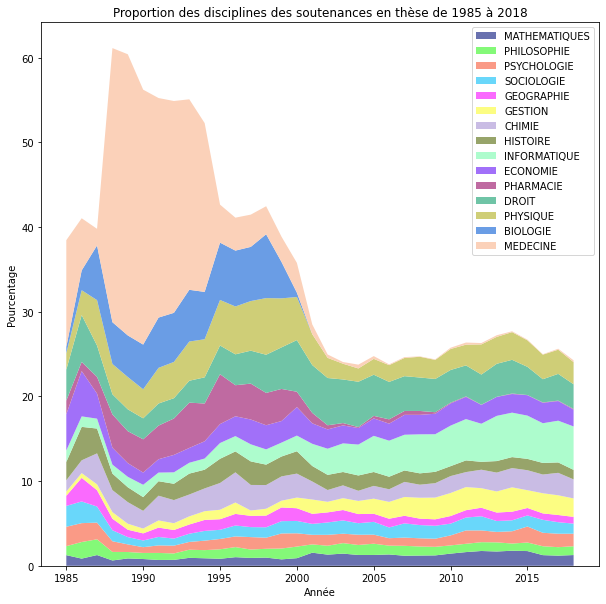

In [42]:
# Création du stackplot
fig, ax = plt.subplots(figsize=(10,10))
ax.stackplot(x_annee, y_principales, labels=labels, colors=colors)
ax.legend()
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.title("Proportion des disciplines des soutenances en thèse de 1985 à 2018")
#plt.savefig("/home/mertes/Documents/DU_Data_Analyst/projet_2/proportion_disciplines.png")
plt.show()

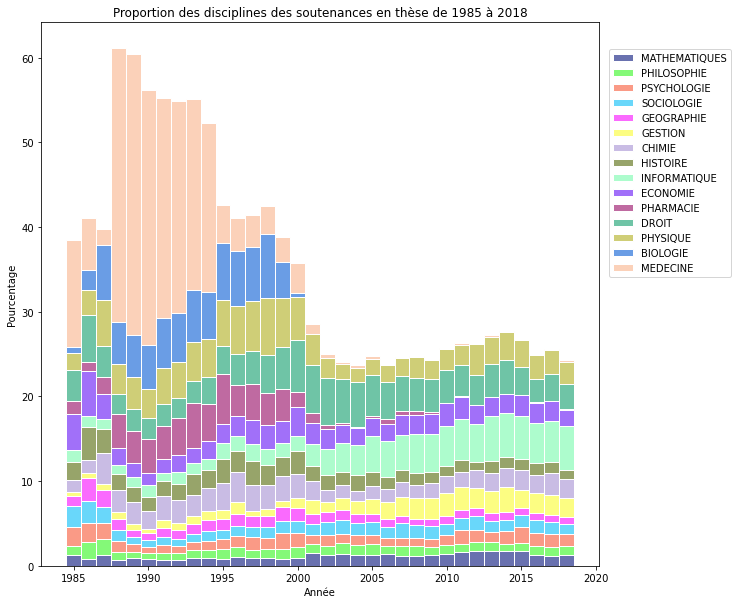

In [43]:
# Création du stacked Barplot
fig, ax = plt.subplots(figsize=(10,10))

# liste des pourcentages de toutes les disciplines pour chaque année
for n, height in enumerate(y_principales):
    if n > 0:
        # création du stack courant avec pour base le sommet du précedent
        ax.bar(x_annee, height, width=1, bottom=bottom, edgecolor='white', label=labels[n], color=colors[n])
        # la base du nouveau stack est le sommet du précédent stack 
        bottom = np.add(bottom, height).tolist()
    else:
        # Création de la première barre
        ax.bar(x_annee, height, width=1, edgecolor='white', label=labels[n], color=colors[n])
        # initialisation de la base du 1er stack
        bottom = height
        
fig.legend(bbox_to_anchor=(1.09, 0.85))
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.title("Proportion des disciplines des soutenances en thèse de 1985 à 2018")
plt.show()

Exercice 2: grille + transparence

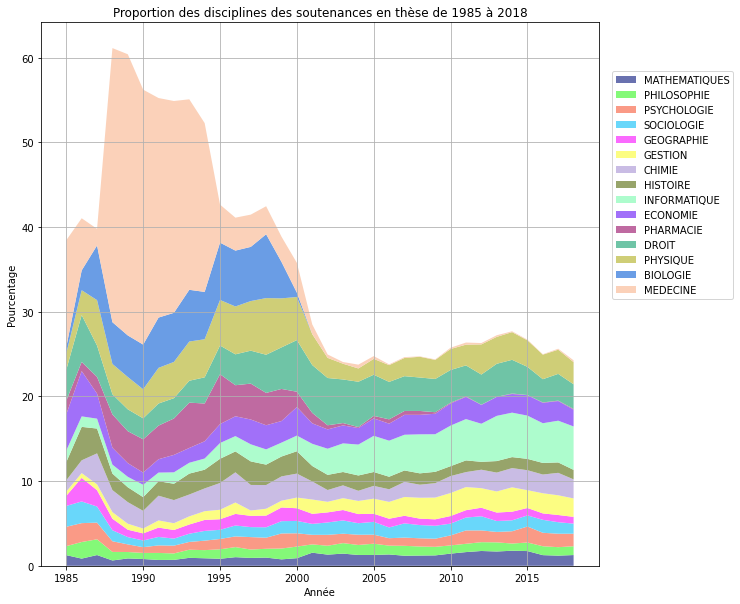

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
ax.stackplot(x_annee, y_principales, labels=labels, colors=colors)
ax.legend(loc="upper right")
ax.legend(loc="right", bbox_to_anchor=(1.25, 0.7), ncol=1)
plt.grid()
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.title("Proportion des disciplines des soutenances en thèse de 1985 à 2018")
plt.show()

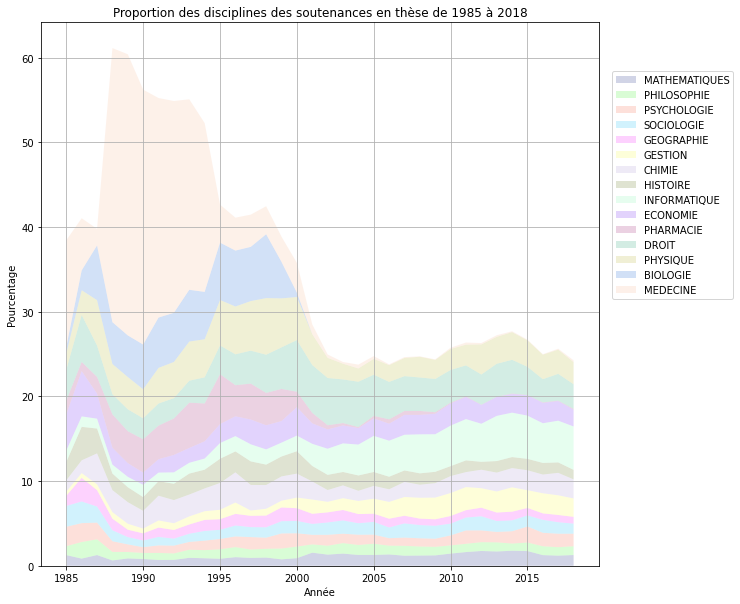

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
ax.stackplot(x_annee, y_principales, labels=labels, alpha=0.3, colors=colors)
ax.legend(loc="upper right")
ax.legend(loc="right", bbox_to_anchor=(1.25, 0.7), ncol=1)
plt.grid()
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.title("Proportion des disciplines des soutenances en thèse de 1985 à 2018")
plt.show()

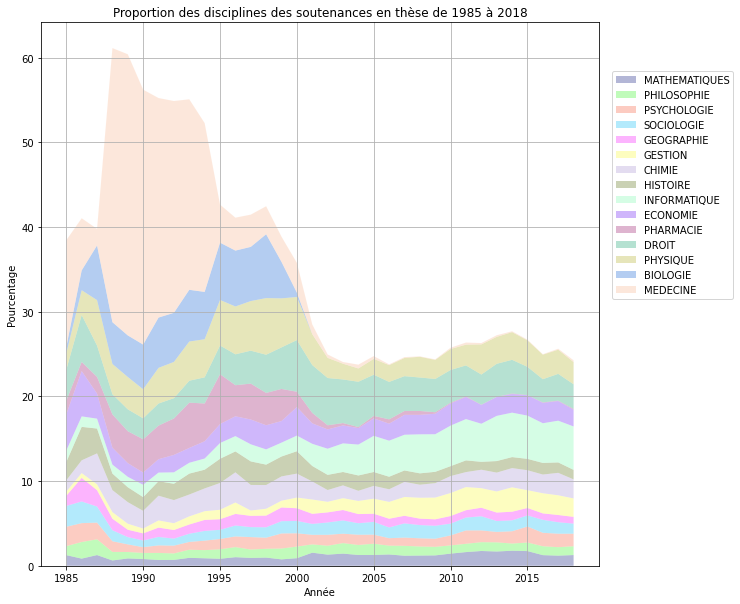

In [46]:
fig, ax = plt.subplots(figsize=(10,10))
ax.stackplot(x_annee, y_principales, labels=labels, alpha=0.5, colors=colors)
ax.legend(loc="upper right")
ax.legend(loc="right", bbox_to_anchor=(1.25, 0.7), ncol=1)
plt.grid()
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.title("Proportion des disciplines des soutenances en thèse de 1985 à 2018")
plt.show()

Exercice 3: Définition de la distance des labels sur les 2 axes

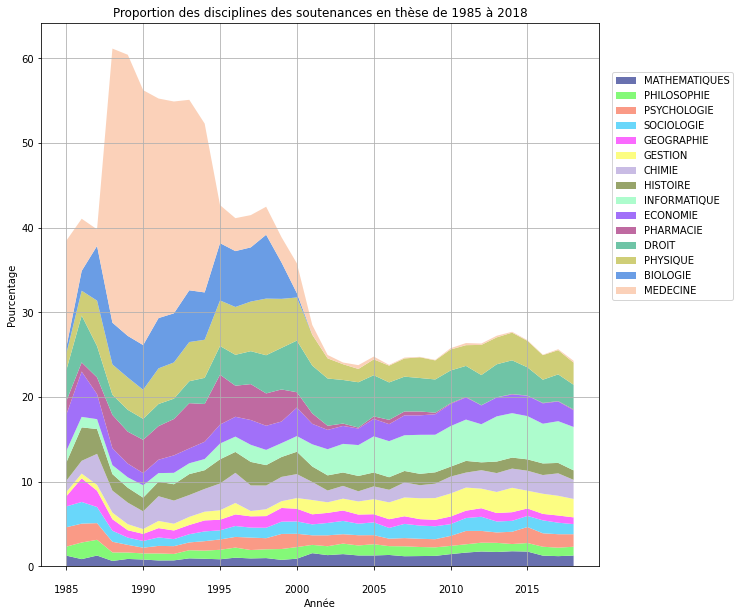

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
ax.stackplot(x_annee, y_principales, labels=labels, colors=colors)
ax.legend(loc="upper right")
ax.legend(loc="right", bbox_to_anchor=(1.25, 0.7), ncol=1)
plt.grid()
# définition de la distance des labels de l'axe X
plt.tick_params(axis='x', which='major', pad=15)
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.title("Proportion des disciplines des soutenances en thèse de 1985 à 2018")
plt.show()

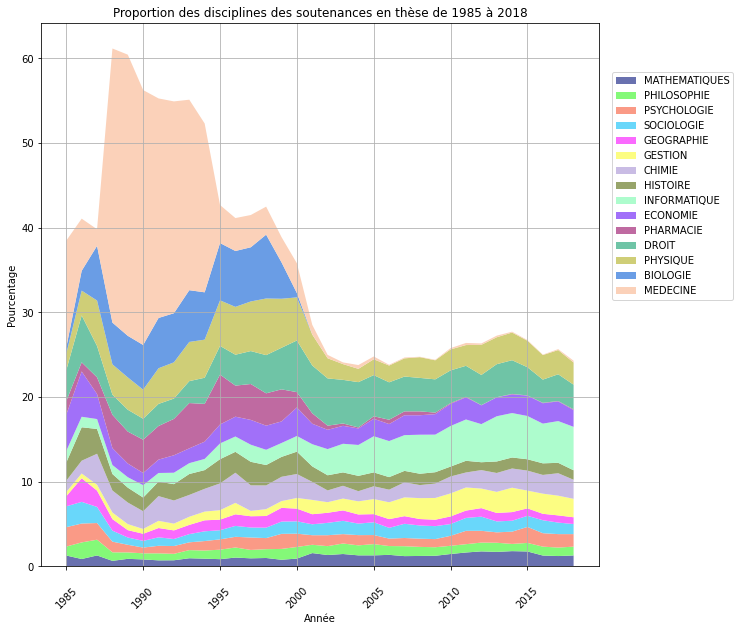

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
ax.stackplot(x_annee, y_principales, labels=labels, colors=colors)
ax.legend(loc="upper right")
ax.legend(loc="right", bbox_to_anchor=(1.25, 0.7), ncol=1)
# définition de la distance des labels de l'axe X
plt.tick_params(axis='x', which='major', pad=15, labelrotation=45)
plt.grid()
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.title("Proportion des disciplines des soutenances en thèse de 1985 à 2018")
plt.show()

Exercice 4 changement de la police (+taille) du label des axes + titre et config. marges

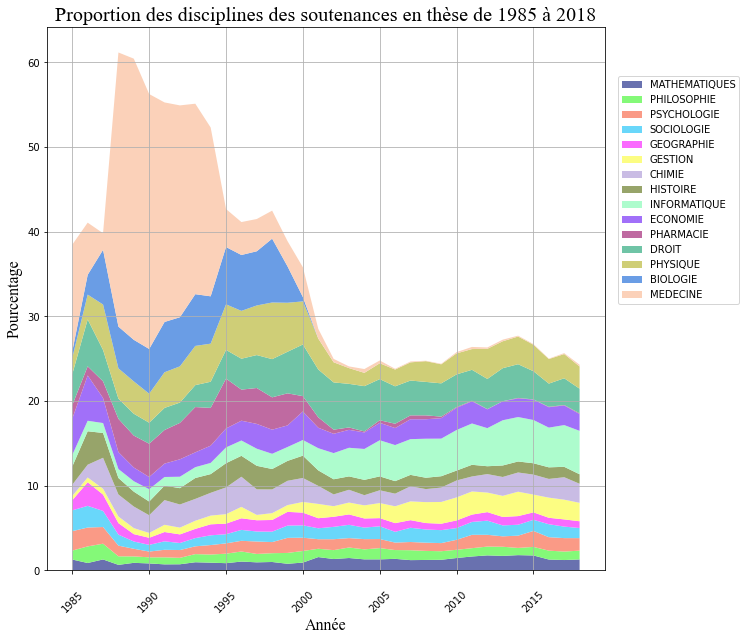

In [49]:
fig, ax = plt.subplots(figsize=(10,10))
ax.stackplot(x_annee, y_principales, labels=labels, colors=colors)
ax.legend(loc="upper right")
ax.legend(loc="right", bbox_to_anchor=(1.25, 0.7), ncol=1)
ax.set_title("Proportion des disciplines des soutenances en thèse de 1985 à 2018", 
             fontsize=20, 
             fontname="Times New Roman")
ax.set_xlabel("Année", fontsize=16, fontname="Times New Roman")
ax.set_ylabel("Pourcentage", fontsize=16, fontname="Times New Roman")
# définition de la distance des labels de l'axe X
plt.tick_params(axis='x', which='major', pad=15, labelrotation=45)
plt.grid()
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.show()

Ajustement des marges:

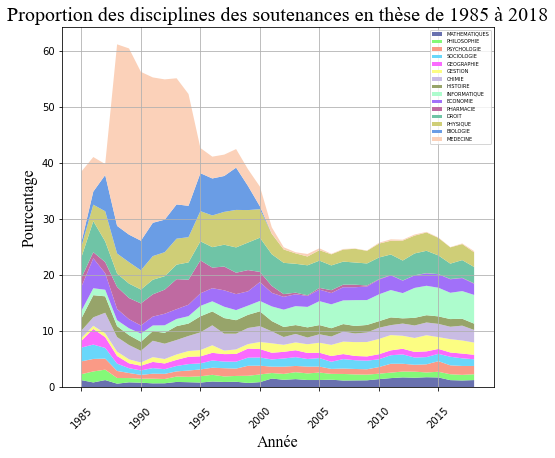

In [50]:
fig, ax = plt.subplots(figsize=(10,10))
fig.subplots_adjust(left=0.20, right=0.8, bottom=0.25, top=0.75) # Ajustement des marges de la figure
ax.stackplot(x_annee, y_principales, labels=labels, colors=colors)
#ax.legend(loc="upper right")
ax.legend(loc="best", ncol=1, fontsize=5)
ax.set_title("Proportion des disciplines des soutenances en thèse de 1985 à 2018", fontsize=20, fontname="Times New Roman")
ax.set_xlabel("Année", fontsize=16, fontname="Times New Roman")
ax.set_ylabel("Pourcentage", fontsize=16, fontname="Times New Roman")
# définition de la distance des labels de l'axe X
plt.tick_params(axis='x', which='major', pad=15, labelrotation=45)
plt.grid()
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.show()

Exercice 5: Echelle logarithmique en ordonnée

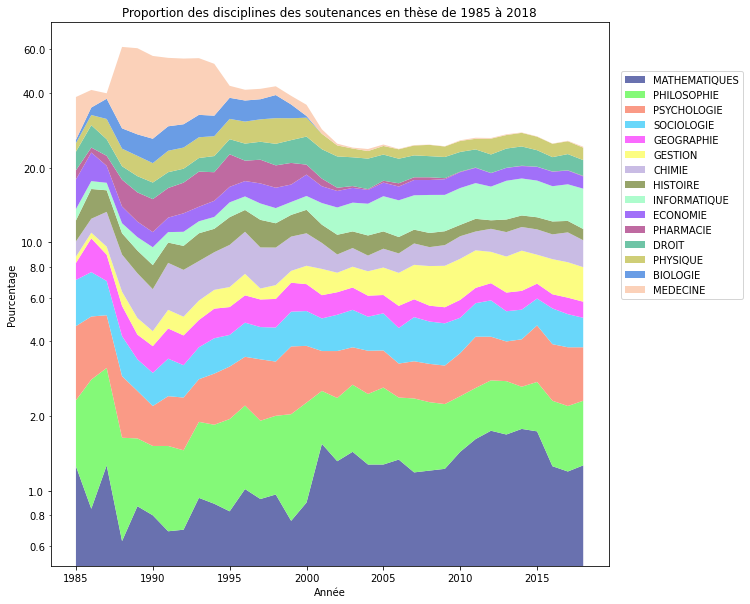

In [51]:
fig, ax = plt.subplots(figsize=(10,10))
ax.stackplot(x_annee, y_principales, labels=labels, colors=colors)
ax.legend(loc="upper right")
ax.set_yscale("log")
ax.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=None))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10, subs=(0.2, 0.4, 0.6, 0.8), numticks=None))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_minor_formatter(ticker.ScalarFormatter())
ax.legend(loc="right", bbox_to_anchor=(1.25, 0.7), ncol=1)
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.title("Proportion des disciplines des soutenances en thèse de 1985 à 2018")
plt.show()

Exercice 6: Position de la légende

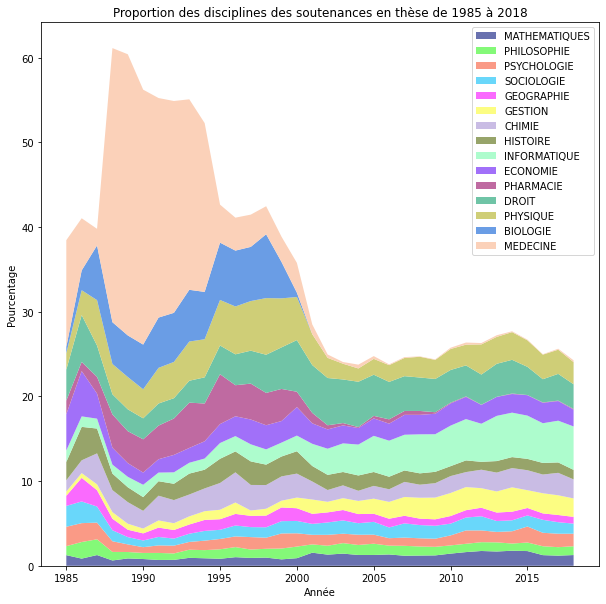

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
ax.stackplot(x_annee, y_principales, labels=labels, colors=colors)
ax.legend(loc="upper right")
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.title("Proportion des disciplines des soutenances en thèse de 1985 à 2018")
plt.show()

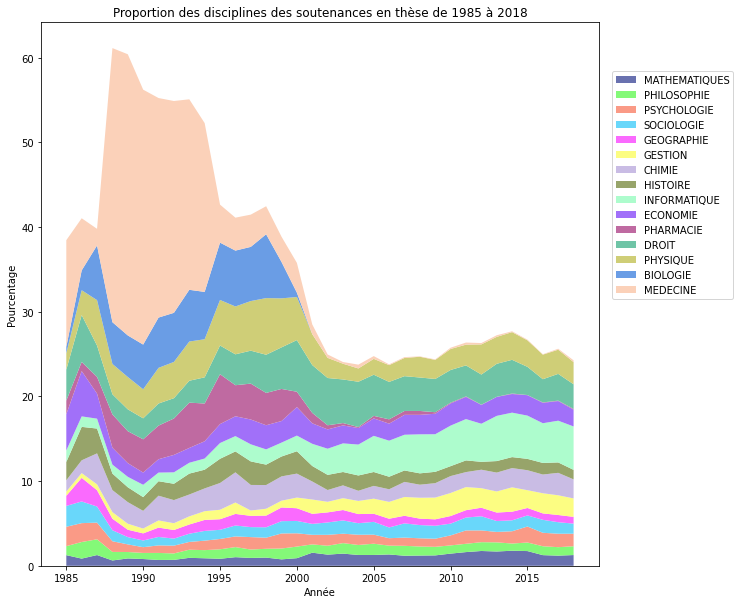

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
ax.stackplot(x_annee, y_principales, labels=labels, colors=colors)
ax.legend(loc="upper right")
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.title("Proportion des disciplines des soutenances en thèse de 1985 à 2018")
ax.legend(loc="right", bbox_to_anchor=(1.25, 0.7), ncol=1)
plt.show()

Exercice 7: Palette des couleurs

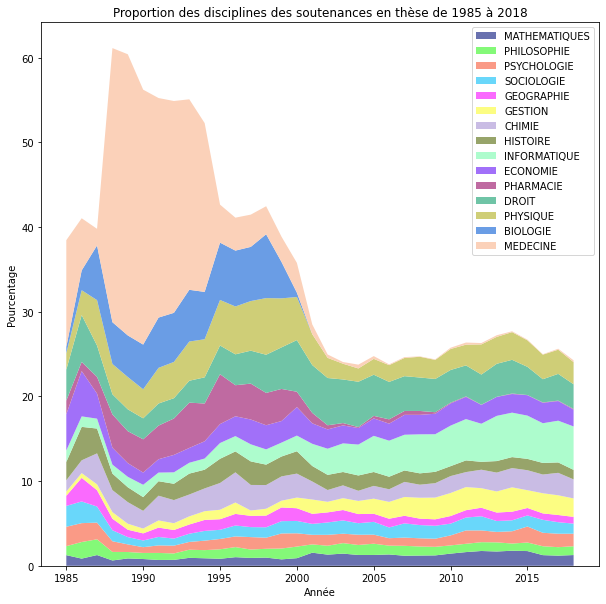

In [54]:
#Création du stackplot
fig, ax = plt.subplots(figsize=(10,10))
ax.stackplot(x_annee, y_principales, labels=labels, colors=colors)
ax.legend(loc="upper right")
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.title("Proportion des disciplines des soutenances en thèse de 1985 à 2018")
plt.show()

Exercice 8: Changement de l'ordre des disciplines

In [55]:
# inversion des éléments de la liste comportant les valeurs pour chaque displicine
y_inverse = list(y_principales)[::-1]

# inversion des disciplines dans la legende
lab_inv = labels[::-1]

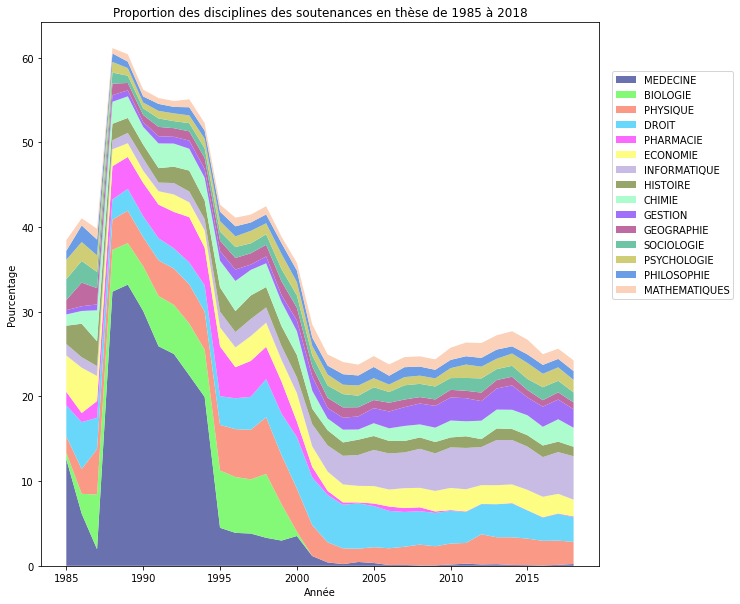

In [56]:
fig, ax = plt.subplots(figsize=(10,10))
ax.stackplot(x_annee, y_inverse, labels=lab_inv, colors=colors)
ax.legend(loc="upper right")
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.title("Proportion des disciplines des soutenances en thèse de 1985 à 2018")
ax.legend(loc="right", bbox_to_anchor=(1.25, 0.7), ncol=1)
plt.show()

Exercice 9:

In [57]:
# Distribution des soutenances pour chaque mois sur toute la période
d_theses = pd.DataFrame({"date": phd[phd["Statut"] == "soutenue"]["Date de soutenance"]}).dropna()
dates_year_month = pd.DataFrame({"annee": d_theses["date"].dt.year, 
                                 "mois": d_theses["date"].dt.month, 
                                 "jour": d_theses["date"].dt.day})
dist_year_month = dates_year_month.groupby(["annee", "mois"], as_index=False)["annee"].value_counts()

In [58]:
# Calcul du nombre de thèses soutenues par mois de chaque année sur toute la période
theses_month = dist_year_month.groupby(["annee", "mois"])["count"].agg(["sum"]).reset_index()

# Calcul du nombre total de thèses pour chaque année sur toute la période
theses_year = theses_month.groupby("annee")["sum"].sum().reset_index()

# Fusion du nombre total de thèses de chaque année avec le nombre de thèses par mois pour chaque année
total_theses = theses_month.merge(theses_year, on="annee", how="inner", suffixes=["_mois", "_annee"]).set_index(["annee", "mois"])

In [59]:
# Calcul du pourcentage de theses par mois sur une année sur toute la période
total_theses["pourcentage"] = total_theses["sum_mois"] / total_theses["sum_annee"] * 100

In [60]:
df_theses = total_theses.reset_index()

In [61]:
df_year = df_theses[(df_theses["annee"] > 2005) & (df_theses["annee"] < 2019)].sort_values(by="mois")

In [62]:
 # Conversion des mois
map_mois = {1: "Janvier", 2: "Février", 3: "Mars", 4: "Avril", 5: "Mai", 6: "Juin", 
            7: "Juillet", 8: "Août", 9: "Septembre", 10: "Octobre", 11: "Novembre", 12: "Décembre"}

In [63]:
num_mois = df_year["mois"].unique()

In [64]:
num_mois

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [65]:
df_year["map_mois"] = df_year["mois"].map(map_mois)

In [66]:
df_year["map_mois"]

27      Janvier
98      Janvier
122     Janvier
86      Janvier
134     Janvier
         ...   
145    Décembre
109    Décembre
61     Décembre
37     Décembre
181    Décembre
Name: map_mois, Length: 155, dtype: object

In [67]:
df_year

,annee,mois,sum_mois,sum_annee,pourcentage,map_mois
27,2006,1,10887,10932,99.588364,Janvier
98,2012,1,4868,13510,36.032568,Janvier
122,2014,1,2410,12537,19.223100,Janvier
86,2011,1,6034,12791,47.173794,Janvier
134,2015,1,1816,12404,14.640439,Janvier
...,...,...,...,...,...,...
145,2015,12,1602,12404,12.915189,Décembre
109,2012,12,1687,13510,12.487047,Décembre
61,2008,12,164,11745,1.396339,Décembre
37,2006,12,2,10932,0.018295,Décembre


In [68]:
# Initialisation des valeurs des mois maquants à 0
df_missing = df_year.pivot_table(index=["mois", "map_mois"], columns=["annee"], values="pourcentage", fill_value=0)

In [69]:
df_missing

,annee,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
mois,map_mois,,,,,,,,,,,,,
1,Janvier,99.588364,97.685026,91.460196,81.275703,69.165233,47.173794,36.032568,28.186701,19.223100,14.640439,11.136456,6.107237,5.154727
2,Février,0.000000,0.025818,0.408685,0.872849,1.359875,2.830115,2.916358,3.941297,4.227487,4.885521,4.228106,3.694798,3.704960
3,Mars,0.009147,0.051635,0.502341,1.317667,2.154502,2.861387,4.019245,4.765867,6.046104,6.086746,5.107943,6.147311,6.375583
4,Avril,0.009147,0.086059,0.493827,1.057491,1.548292,2.650301,3.079201,4.183372,4.841669,5.159626,4.260692,4.664583,4.620602
5,Mai,0.036590,0.068847,0.578970,1.200168,1.474564,3.439919,4.256107,5.560179,5.838717,4.450177,6.362525,5.530176,7.147096
6,Juin,0.018295,0.206540,0.783312,1.821234,2.908167,5.613322,6.565507,7.300098,7.745075,7.441148,8.610998,10.675643,9.427724
7,Juillet,0.018295,0.180723,0.297999,1.023919,1.810437,3.072473,3.338268,2.836826,3.469730,4.474363,5.230143,4.496273,4.417126
8,Août,0.036590,0.068847,0.366113,0.788922,1.654788,2.384489,1.450777,2.216507,2.879477,3.885843,4.317719,3.911197,2.628232
9,Septembre,0.027442,0.240964,0.672627,1.905162,2.949128,7.434915,7.364915,8.101974,10.193826,12.826508,13.596741,10.988218,11.013141


In [70]:
df_missing = df_missing.reset_index().melt(id_vars=["mois", "map_mois"], value_name="pourcentage").sort_values(by=["annee", "mois"])

In [71]:
df_missing

,mois,map_mois,annee,pourcentage
0,1,Janvier,2006,99.588364
1,2,Février,2006,0.000000
2,3,Mars,2006,0.009147
3,4,Avril,2006,0.009147
4,5,Mai,2006,0.036590
...,...,...,...,...
151,8,Août,2018,2.628232
152,9,Septembre,2018,11.013141
153,10,Octobre,2018,9.919457
154,11,Novembre,2018,17.083510


In [72]:
# labels par année du slider
years = df_missing.annee.unique()

In [73]:
years

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018], dtype=object)

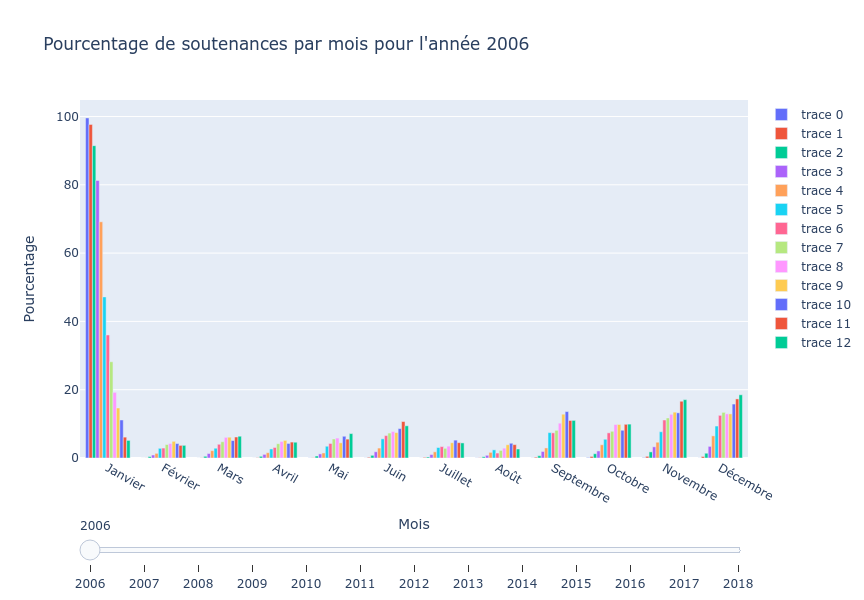

In [83]:
fig = go.Figure()
for year in years:
    df = df_missing[df_missing["annee"] == year]
    fig.add_trace(go.Bar(x=df['map_mois'], 
                         y=df['pourcentage']))
    
#  Paramétres du slider
slider = {
    'steps': [{'label': str(year), 'method': 'update', 'args': [{'visible': [year == y for y in years]}, {'title': f"Pourcentage de soutenances par mois pour l'année {year}"}]} for year in years],
    'active': 0,
    'y': -0.1,
}

# Paramètres de la figure
fig.update_layout(
    width=800,
    height=600,
    sliders=[slider],
    title=f"Pourcentage de soutenances par mois pour l'année {years[0]}",
    xaxis_title="Mois",
    yaxis_title="Pourcentage"
)

fig.show()


In [84]:
# Création du widget html 
widget_html = plot(fig, output_type='div')
file = open("widget_slider.html", "w")
file.write(str(widget_html))
file.close()

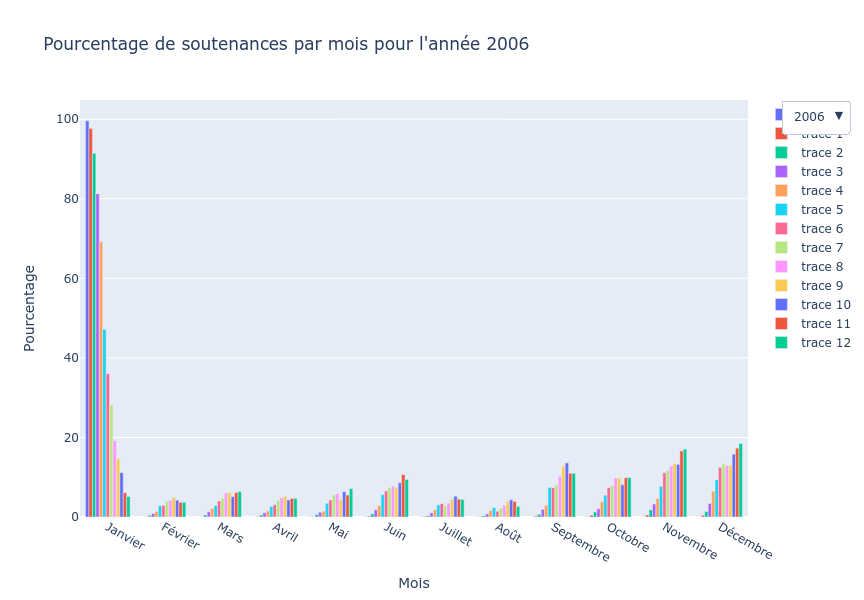

In [81]:
fig = go.Figure()
for year in years:
    df = df_missing[df_missing["annee"] == year]
    fig.add_trace(go.Bar(x=df['map_mois'], 
                         y=df['pourcentage']))
    
# Paramétres du slider
selector = {
    'buttons': [{'label': str(year), 'method': 'update', 'args': [{'visible': [year == y for y in years]}, {'title': f"Pourcentage de soutenances par mois pour l'année {year}"}]} for year in years],
    'active': 0
}

# Paramètres de la figure
fig.update_layout(
    width=800,
    height=600,
    updatemenus=[dict(selector, x=1.05, xanchor='left')],
    title=f"Pourcentage de soutenances par mois pour l'année {years[0]}",
    xaxis_title="Mois",
    yaxis_title="Pourcentage"
)
fig.show()

In [82]:
# Création du widget html 
widget_html = plot(fig, output_type='div')
file = open("widget_selector.html", "w")
file.write(str(widget_html))
file.close()